In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/easiest-diabetes-classification-dataset/Diabetes Classification.csv


# Preface

# Feature Dictionary

# Importing Libraries and Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/easiest-diabetes-classification-dataset/Diabetes Classification.csv")

# Numerical Analysis

In [4]:
# Let's see how the data looks like
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [5]:
# Let's check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


<div class="alert alert-block alert-info"> 📌 We observe that all columns are correctly assigned data types.</div>

In [6]:
# Let's check for Null Values
df.isna().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

<div class="alert alert-block alert-info"> 📌 We observe that there are no null values in the dataset</div>

In [7]:
# Let's check the mathematical statistics for our data
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


In [8]:
# Let's check for duplicated values
df.duplicated().sum()

0

<div class="alert alert-block alert-info"> 📌 We observe that there are no duplicate entries in our data</div>

# Univariate Data Analysis

In [9]:
df.sample()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
17,30,Female,20,Normal,100,5.7,No,No,Healthy,Regular,No


<AxesSubplot: ylabel='Gender'>

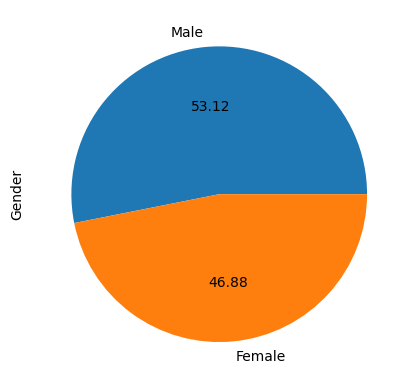

In [10]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

<div class="alert alert-block alert-info"> 📌 Our data is quite evenly distributed by gender with a minor male bias</div>

<AxesSubplot: >

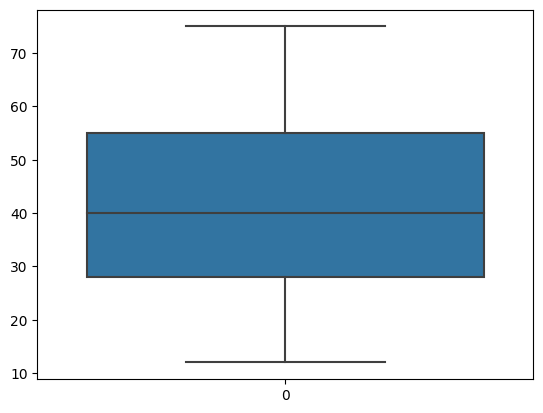

In [11]:
sns.boxplot(df['Age'])

<div class="alert alert-block alert-info"> 📌 There are no outliers in Age of respondents with 40 being the mean age</div>

<AxesSubplot: >

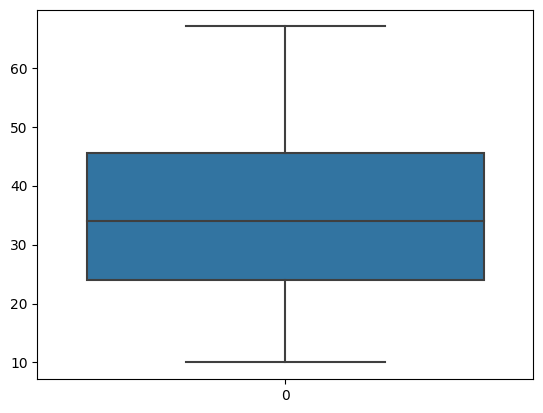

In [12]:
sns.boxplot(df['BMI'])

<div class="alert alert-block alert-info"> 📌 We observe that approx 34 is the mean BMI which slightly skews the data towards more overweight respondees</div>

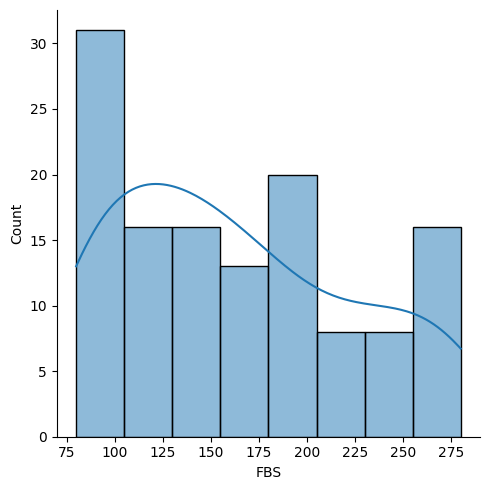

In [15]:
sns.displot(df['FBS'],kde=True)

<div class="alert alert-block alert-info"> 📌 We observe that Fasting Blood Sugar is right skewed with a dramatically high amount in the higher range</div>

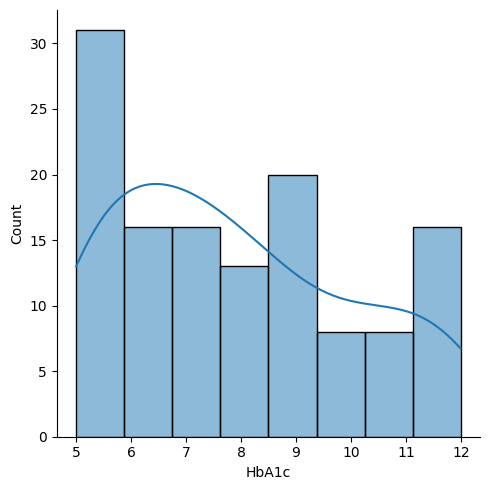

In [16]:
sns.displot(df['HbA1c'],kde=True)

<div class="alert alert-block alert-info"> 📌 We observe that</div>

# Multivariate Data Analysis